# Analiza regresji
***

## Wstęp

Algorytmy regresyjne należą do grupy *uczenia nadzorowanego* (Supervised Learning), inaczej mówiąc, są to algorytmy mające określoną zmienną celu (target) oraz zdefiniowane zmienne wejściowe. W odróżnieniu od klasyfikacji, w regresji zmienna celu jest liczbą rzeczywistą. Analiza regresji jest jedną z metod analizy statystycznej pozwalających opisać zależność między zmienną objaśnianą $y \in \mathbb{R}$ (zmienna celu, zmienna zależna) oraz zmienną, bądź kilkoma, zmiennymi objaśniającymi (niezależnymi) $x \in \mathbb{R}^d$.

Załóżmy, że chcemy wystawić na sprzedaż dom, ale nie znamy jego wartości. Powinniśmy zatem przyjrzeć się innym domom w okolicy, sprzedanym w niedalekiej przeszłości i na podstawie cen sprzedaży oraz innych czynników, takich jak ilość sypialni czy powierzchnia użytkowa, określić wartość domu, który chcemy sprzedać. 

W badanym przypadku, zmienną zależną będzie cena domu, natomiast zmiennymi niezależnymi będą ilość sypialni, ilość łazienek, powierzchnia w m2, rok budowy itd. Znajdując zależność między tymi zmiennymi, będziemy w stanie określić jakie czynniki mają faktyczny wpływ na wartość domu oraz który czynnik jest najbardziej istotny, a także przewidzieć cenę za jaką sprzedamy nasz dom. 

***
## Modele regresyjne

Zostanie przedstawionych 6 następujących algorytmów regresyjnych:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree
- Random Forest
- LGBM

### Linear Regression

Załóżmy, że mamy wektor $X^T = (1, x_1, x_2,\dots, x_p)$ i chcemy przewidzieć wartość zmiennej $y$. Model regresji liniowej przedstawia się następująco: 
$$f(X) = \sum_{j=0}^p x_j \beta_j + \epsilon_j,$$

gdzie $\beta_j$ nazywane są współczynnikami, a $\epsilon_j$ jest składnikiem losowym. 

Model regresji liniowej zakłada, że warunkowa wartość oczekiwana $E(Y|X)$ jest funkcją liniową. 

Najpopularniejszą metodą estymacji liniowej zależności jest <b>metoda najmniejszych kwadratów</b>, która wyznacza współczynniki $\beta$ funkcji

$$\hat{f}(X) = \sum_{j=0}^p x_j \beta_j$$
tak, aby zminimalizować błąd kwadratowy
    $$RSS(\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 = \big(X \beta - y\big)^T \big(X \beta - y\big).$$


Matematycznie problem ten można opisać wzorem:


$$ 	\frac{\partial RSS}{\partial \hat{\beta}} = 0$$


Po zróżniczkowaniu i po przekształceniach otrzymujemy wzór na współczynniki $\hat{\beta}$:

$$ \hat{\beta} = (X^TX)^{-1} X^T y$$

Poniższa ramka danych zawiera informację o cenie sprzedaży domów oraz ich powierzchni.

In [1]:
#Załadowanie bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import sklearn.metrics as metrics
import numpy as np

In [2]:
#Parametry do wizualizacji
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
#Stworzenie ramki danych
data = pd.DataFrame(([76, 350], [80, 370], [150, 540], [200, 600], [50, 300], [300, 800], [120, 490], [130, 500],
                    [250, 700], [120, 700]), 
                   columns=['M2', 'Cena'])

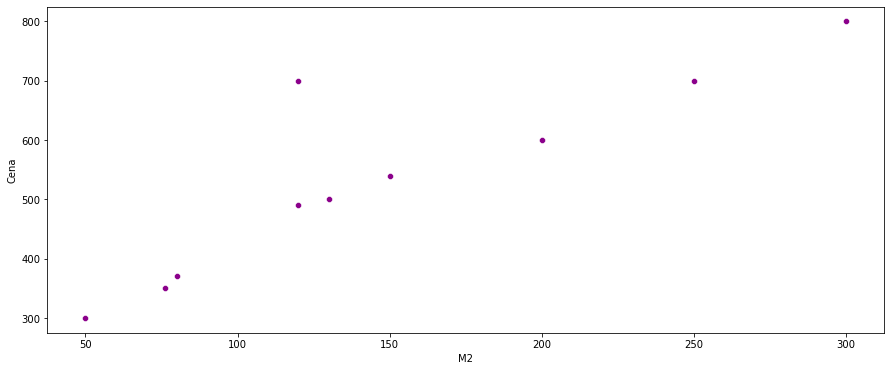

In [4]:
#Wizualizacja danych
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
plt.show()

Możemy założyć, że istnieje liniowa zależność pomiędzy ceną domu, a powierzchnią w m2. Czyli, szukamy funkcji $\hat{f}$ takiej, że: 

$$cena \approx \hat{ \beta}_0 + \hat{\beta}_1 \cdot m2 \$$ 




In [5]:
X = data.loc[:, 'M2']
X = X.values.reshape(-1, 1)
y = data.loc[:, 'Cena']

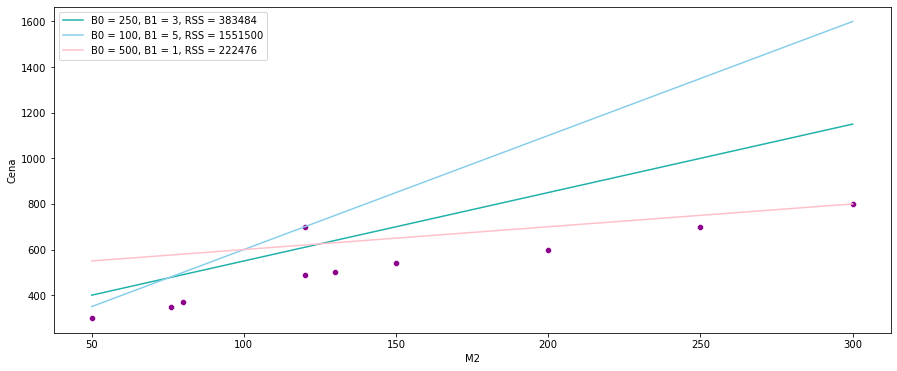

In [6]:
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = 3 * data['M2'] + 250, color = 'lightseagreen', label = "B0 = 250, B1 = 3, RSS = " + str(np.sum(np.square(3 * data['M2'] + 250 - y))))
sns.lineplot(data=data, x=data['M2'], y = 5 * data['M2'] + 100, color = 'skyblue', label = "B0 = 100, B1 = 5, RSS = " + str(np.sum(np.square(5 * data['M2'] + 100 - y))))
sns.lineplot(data=data, x=data['M2'], y = 1 * data['M2'] + 500, color = 'pink', label = "B0 = 500, B1 = 1, RSS = " + str(np.sum(np.square(1 * data['M2'] + 500 - y))))
plt.legend()
plt.show()

Widzimy, że najmniejszy błąd kwadratowy daje nam różowa linia. 
Aby znaleźć najlepsze z możliwych rozwiązań, wykorzystamy funkcję LinearRegression z biblioteki scikit-learn do znalezienia wartości współczynników $ \hat{ \beta}_0, \hat{ \beta}_1$ metodą najmniejszych kwadratów.

In [7]:
reg = LinearRegression(positive=False,        #positive = True may be useful when all the coefficients have to be non-negative, e.g. prices of goods.
                       fit_intercept=True)    #if set to False, no intercept will be used in calculations
reg.fit(X,y)

LinearRegression()

In [8]:
#Współczynnik
reg.coef_

array([1.83141395])

In [9]:
#Wyraz wolny
reg.intercept_

264.68330134357

Znaleziona funkcja przedstawia się następująco:

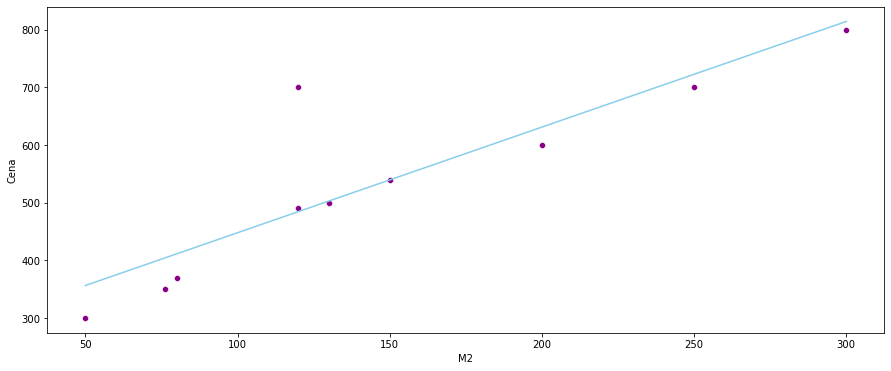

In [10]:
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = reg.coef_ * data['M2'] + reg.intercept_, color = 'skyblue')
plt.show()

Błąd kwadratowy w tym przypadku wynosi: 

In [11]:
y_pred = reg.predict(X)
np.sum(np.square(y_pred - y))

55928.854766474724

***

### Ridge Regression

*Overtfitting* to nadmierne dopasowanie modelu do danych, przez co na zbiorze treningowym błąd kwadratowy będzie bliski zeru, natomiast na zbiorze testowym będzie bardzo duży. W regresji liniowej zjawisko to, wystąpić może w przypadku, gdy mamy mniej obserwacji niż predyktorów. 

<img src="Bias_and_variance_contributing_to_total_error.svg.png" width=700 height=400 /> *Źródło: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff*

W celu rozwiązania problemu przeuczenia modelu, należy znaleźć kompromis między wariancją a przeciążeniem. Dokonać tego można dodając regularyzację do modelu.

**Norma $Lp$**

Niech $x = (x_1, x_2, ..., x_n) \in \mathbf{X}$. Funkcje postaci
$$ ||x||_p = (|x_1|^p + |x_2|^p + ... |x_n|^p ) ^{\frac{1}{p}} $$

są normami dla $ 1 \leq p < \infty $. Normę $||x||_2 $ nazywa się *normą euklidesową*. 





<b> Ridge Regression</b> wykorzystuje normę euklidesową $L2$, aby "ukarać" model za wielkość współczynników. Wtedy zamiast minimalizacji błędu resztowych sum kwadratów, minimalizowana jest funkcja: 

$$RSS_{Ridge} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} \beta_j^2, $$

gdzie $\alpha$ jest hiperparametrem, nazywanym współczynnikiem kary. Przyjmuje wartości $\alpha \geq 0$. Im wyższa jego wartość, tym model jest bardziej "karany".
***

Dla celów edukacyjnych podzielimy zbiór tak, aby w zbiorze treningowym były tylko 2 obserwacje. Jest to zabieg celowy, gdyż chcemy pokazać przykład overtfittingu. 

In [12]:
data_train, data_test = train_test_split(data, test_size = 0.8, random_state = 10)
X_train = data_train.loc[:, 'M2']
y_train = data_train.loc[:, 'Cena']
X_test = data_test.loc[:, 'M2']
y_test = data_test.loc[:, 'Cena']

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

Często $\alpha$ wybiera się z przedziału $[0,1]$. W naszym przypadku wartości te są zbyt małe, więc musieliśmy ją znacznie zwiększyć. Ponieważ $\alpha$ jest hiperparametrem, w celu znalezienia najlepszej wartości można wykorzystać *walidację krzyżową*. 

In [13]:
ridge1 = Ridge(alpha = 0)       #warto zwrócić uwagę, że alpha = 0 daje nam zwykłą regresję liniową
ridge1.fit(X_train, y_train)

Ridge(alpha=0)

In [14]:
ridge2 = Ridge(alpha = 200)
ridge2.fit(X_train, y_train)

Ridge(alpha=200)

In [15]:
ridge3 = Ridge(alpha = 1000)
ridge3.fit(X_train, y_train)

Ridge(alpha=1000)

In [16]:
ridge4 = Ridge(alpha = 5000)
ridge4.fit(X_train, y_train)

Ridge(alpha=5000)

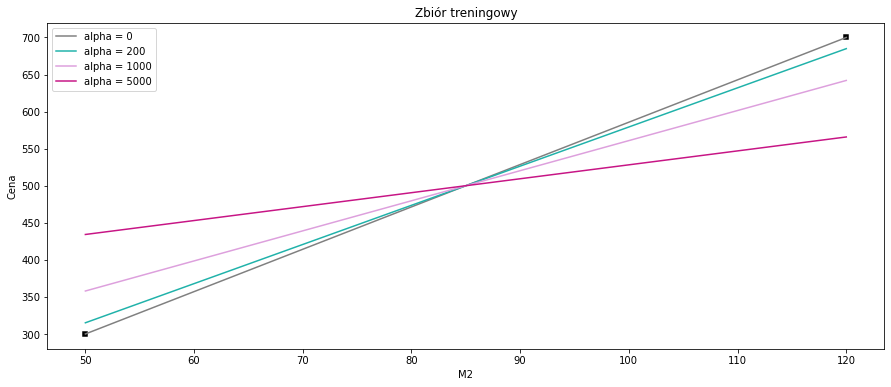

In [17]:
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data_train['M2'], y = ridge1.coef_ * data_train['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data_train['M2'], y = ridge2.coef_ * data_train['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data_train['M2'], y = ridge3.coef_ * data_train['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data_train['M2'], y = ridge4.coef_ * data_train['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór treningowy")
plt.show()

Możemy zauważyć, że na zbiorze treningowym regresja liniowa dopasowuje się idealnie do obserwacji, gdzie regresja grzbietowa wraz ze wzrostem parametru $\alpha$ wydaje się mieć coraz gorsze dopasowanie. Zobaczmy jak to wygląda na zbiorze testowym. 

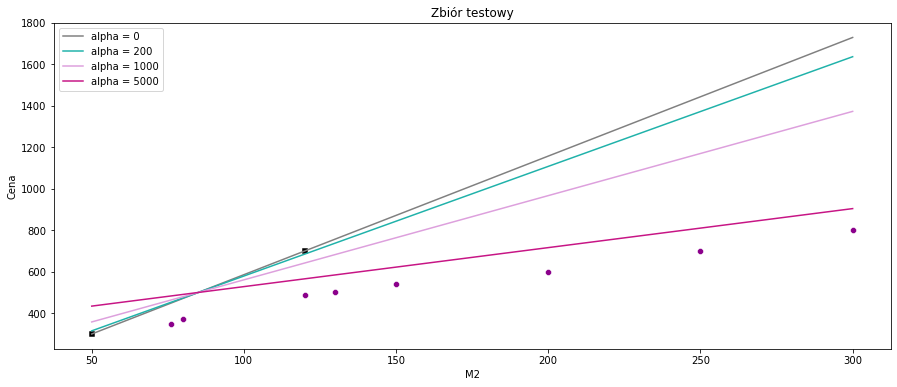

In [18]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data['M2'], y = ridge1.coef_ * data['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = ridge2.coef_ * data['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = ridge3.coef_ * data['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = ridge4.coef_ * data['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

W przypadku regresji liniowej widoczny jest **overfittting**. Linia przechodzi dokładnie przez dwie obserwacje ze zbioru treningowego, zatem błąd kwadratowy będzie równy zero, natomiast na zbiorze testowym błąd ten będzie bardzo duży. Aby zapobiec takiej sytuacji, została wykorzystana Ridge Regression.

In [19]:
wyniki = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(ridge1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(ridge2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, ridge1.predict(X_test)),
                                   metrics.r2_score(y_test, ridge2.predict(X_test)),
                                   metrics.r2_score(y_test, ridge3.predict(X_test)),
                                   metrics.r2_score(y_test, ridge4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, ridge1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849875,403.392857
alpha = 200,1615208.000000,-8.742643,369.646226
alpha = 1000,814095.000000,-3.910474,273.786232
alpha = 5000,88315.000000,0.467297,103.296980


Widzimy, że im większy współczynnik kary, tym model jest bardziej dopasowany do pozostałych obserwacji. 

***

### Lasso Regression

**Lasso Regression** jest kolejną metodą służącą do redukcji overfittingu, ale tym razem wykorzystującą do regularyzacji normę $L1$. 

Funkcja celu modelu Lasso Regression wygląda następująco: 

$$RSS_{Lasso} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} |\beta_j|, $$

In [20]:
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X_train, y_train)

Lasso(alpha=0.001)

In [21]:
lasso2 = Lasso(alpha = 200)
lasso2.fit(X_train, y_train)

Lasso(alpha=200)

In [22]:
lasso3 = Lasso(alpha = 1000)
lasso3.fit(X_train, y_train)

Lasso(alpha=1000)

In [23]:
lasso4 = Lasso(alpha = 5000)
lasso4.fit(X_train, y_train)

Lasso(alpha=5000)

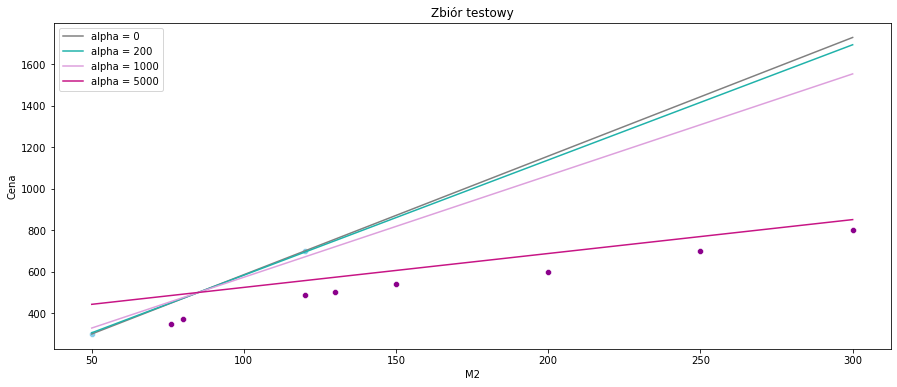

In [24]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='skyblue')
sns.lineplot(data=data, x=data['M2'], y = lasso1.coef_ * data['M2'] + lasso1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = lasso2.coef_ * data['M2'] + lasso2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = lasso3.coef_ * data['M2'] + lasso3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = lasso4.coef_ * data['M2'] + lasso4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

Tutaj również możemy wyciągnąć wniosek, że im większy współczynnik kary, tym dopasowanie modelu jest lepsze. 

In [25]:
wyniki2 = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(lasso1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(lasso2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, lasso1.predict(X_test)),
                                   metrics.r2_score(y_test, lasso2.predict(X_test)),
                                   metrics.r2_score(y_test, lasso3.predict(X_test)),
                                   metrics.r2_score(y_test, lasso4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, lasso1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki2

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849871,403.392793
alpha = 200,1828182.000000,-10.027261,390.617347
alpha = 1000,1332914.000000,-7.039895,339.515306
alpha = 5000,62549.000000,0.622717,84.005102


Używanie normy $L1$ może także spowodować, że w przypadku modelu o kilku zmiennych objaśniających, współczynniki dla niektórych z nich zostaną wyzerowane.

**Interpretacja geometryczna**

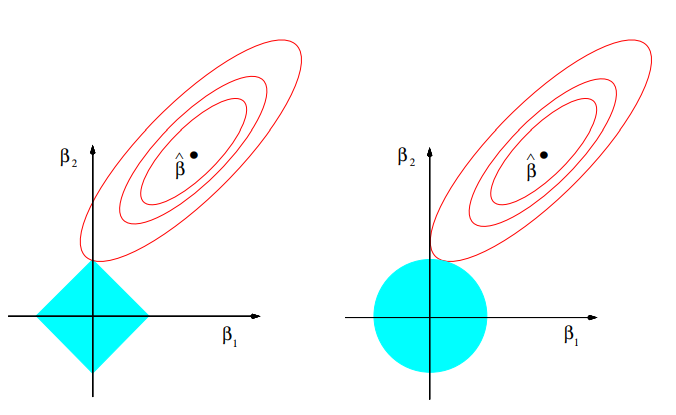

Źródło: *The Elements of Statistical Learning* Trevor Hastie, Robert Tibshirani, Jerome Friedman, Second Edition. 


Czerwone elipsy odpowiadają za błąd kwadratowy, natomiast niebieskie kolory przedstawiają kulę w metrykach $L1$ i $L2$ odpowiednio. W związku z tym, że kula w metryce $L1$ ma kwadratowy kształt, to kiedy suma resztowa kwadratów znajdzie się w jednym z rogów, współczynnik jest zerowany. W Ridge Regression współczynniki te zbliżają się do zera, ale nigdy nie osiągają wartości równej 0. 

Z tego też względu **Lasso Regression** jest często wykorzystywane również do wyboru zmiennych modelu. 

***